In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import numpy as np
# import torch
# from Core.Dataset import PoseModelDataset
# from Configs.Configs import PoseMLPConfig
# import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [11]:
import numpy as np
import copy

from Core.Rotations import (
    axis_angle_to_matrix,
    matrix_to_rotation_6d,
    rotation_6d_to_matrix,
)
from torch.utils.data.dataloader import default_collate

from Core.VisualizationUtils import (SMPL, random_camera,
                                     projection, j2d_to_y,
                                     viz_smpl, show_points,
                                     dcn)

In [3]:
config = PoseMLPConfig()

In [5]:
sorted(glob.glob(config.data_dir + "/*.npz"))

['./Data/PoseData/A1 - Stand_poses.npz']

In [8]:
sequences = sorted(glob.glob(config.data_dir + "/*.npz"))

In [4]:
dataset = PoseModelDataset(config)

Number of sequences 1


In [13]:
sample = dataset[0]

In [15]:
img = dataset.viz(sample['x'], sample)

In [1]:
import matplotlib.pyplot as plt

/Users/apoorv/Library/Jupyter/runtime


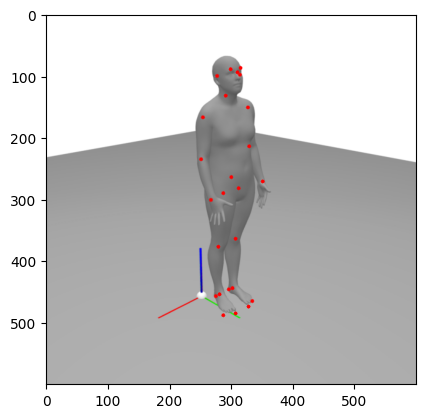

In [18]:
plt.imshow(img[-1])

In [17]:

from Configs.Configs import PoseTransformersConfig, PoseMLPConfig
from Core.Utils import DDPM, diffusion_noise_schedule

In [27]:
config_mlp = PoseMLPConfig()
config_transformer = PoseTransformersConfig()

In [28]:
dataset = PoseModelDataset(config_transformer)

Number of sequences 14096


In [43]:
test = DDPM('pose_mlp')

In [45]:
test.train(config_mlp, 2)

****** Training Initiated ******
Run number: 2
Config:
    inp_dim = 144
    out_dim = 50
    data_dir = './Data/PoseData'
    smpl_model_dir = './SupportingFiles/SMPLModel/smpl/models/basicmodel_m_lbs_10_207_0_v1.1.0.pkl'
    save_dir = './Models/PoseMLP'
    subset = 'full'
    wt_norm_ind = False
    act_lyr = 'batch'
    act_fn = 'gelu'
    batch_size = 1024
    n_workers = 4
    lr = 0.0001
    wt_decay = 0.001
    save_bw_ep = True
    n_epochs = 500
    n_resnets = 3
    n_hid_dim = 128
    drop_prob = 0.1
    n_time = 500
    beta_range = (0.0001, 0.02)
    n_epochs_bw_saves = 50
Number of sequences 14096


  0%|          | 0/500 [00:00<?, ?it/s]

0 1.148564338684082
1 2.2937159538269043
2 3.4325404167175293
3 4.567712783813477


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f093b393160>
Traceback (most recent call last):
  File "/home/darve/apoorv1/.conda/envs/diff/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/home/darve/apoorv1/.conda/envs/diff/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/home/darve/apoorv1/.conda/envs/diff/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f093b393160>
Traceback (most recent call last):
  File "/home/darve/apoorv1/.conda/envs/diff/lib/python3.9/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/home/darve/apoorv1/.conda/envs/diff/

KeyboardInterrupt: 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Core.Utils import DDPM
from Configs.Configs import PoseMLPConfig, PoseTransformersConfig

In [4]:
config = PoseMLPConfig()
ddpm = DDPM('pose_mlp')

In [6]:
ddpm.train(config, 100)

****** Training Initiated ******
Run number: 100
Config:
    inp_dim = 144
    out_dim = 50
    data_dir = './Data/PoseData'
    smpl_model_dir = './SupportingFiles/SMPLModel/smpl/models/basicmodel_m_lbs_10_207_0_v1.1.0.pkl'
    save_dir = './Models/PoseMLP'
    subset = 'full'
    wt_norm_ind = False
    act_lyr = 'batch'
    act_fn = 'gelu'
    batch_size = 16
    n_workers = 1
    lr = 0.0001
    wt_decay = 0.001
    save_bw_ep = True
    n_epochs = 500
    n_resnets = 5
    n_hid_dim = 512
    drop_prob = 0.1
    n_time = 500
    beta_range = (0.0001, 0.02)
    n_epochs_bw_saves = 50
training on cpu
Number of sequences 14096


  0%|          | 0/500 [03:33<?, ?it/s]


KeyboardInterrupt: 